In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
#one hot encoding
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
#pipeline trf and logisticregresstion fit
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score


In [ ]:
match=pd.read_csv('matches.csv')
delivery=pd.read_csv('deliveries.csv')

In [ ]:
match.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [ ]:
delivery.head()


,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [ ]:

delivery.info()
delivery.isnull().mean()*100
#we are just extracting the vaule from the given data set is match_id,inning and total_run

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

,0
match_id,0.000000
inning,0.000000
batting_team,0.000000
bowling_team,0.000000
over,0.000000
ball,0.000000
batsman,0.000000
non_striker,0.000000
bowler,0.000000
is_super_over,0.000000


In [ ]:
match.shape #we have the 756 matches data

(756, 18)

In [ ]:
delivery.shape #ball by ball details all 20 overs data is here

(179078, 21)

In [ ]:

# we have used groupby to extract the value from delivery dataset
total_score_df=delivery.groupby(['match_id','inning']).sum()['total_runs'].reset_index()
total_score_df

,match_id,inning,total_runs
0,1,1,207
1,1,2,172
2,2,1,184
3,2,2,187
4,3,1,183
...,...,...,...
1523,11413,2,170
1524,11414,1,155
1525,11414,2,162
1526,11415,1,152


In [ ]:
#we are cleaing second inning data just using the first inning data
total_score_df=total_score_df[total_score_df['inning']==1]
#we wil merge the total_score_df in the match data
match_df=match.merge(total_score_df[['match_id','total_runs']],left_on='id',right_on='match_id')
match_df

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,match_id,total_runs
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1,207
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN,2,184
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN,3,183
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN,4,163
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN,5,157
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,IPL-2019,Mumbai,05-05-2019,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi,11347,143
752,11412,IPL-2019,Chennai,07-05-2019,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould,11412,136
753,11413,IPL-2019,Visakhapatnam,08-05-2019,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN,11413,171
754,11414,IPL-2019,Visakhapatnam,10-05-2019,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin,11414,155


In [ ]:
match_df['team1'].unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [ ]:
#team presently playing in the ipl we have data from old to new matches so we want to take only these team data
teams={
    'Sunrisers Hyderababd',
    'Mumbai Indians',
    'Royal Challengers Bangalore',
    'Kolkata Knight Riders',
    'Kings XI Punjab',
    'Chennai Super Kings',
    'Rajasthan Royals',
    'Delhi Capitals'
}

In [ ]:
#replace Delhi daradevils to delhi capitals
match_df['team1']=match_df['team1'].str.replace('Delhi Daredevils','Delhi Capitals')
match_df['team2']=match_df['team2'].str.replace('Delhi Daredevils','Delhi Capitals')

#replace the name of the team Deccan Chargers to Sunrisers Hyderabad
match_df['team1']=match_df['team1'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
match_df['team2']=match_df['team2'].str.replace('Deccan Chargers','Sunrisers Hyderabad')

In [ ]:
#know we are using the teams value to kept in data so it will help for the model
match_df=match_df[match_df['team1'].isin(teams)]
match_df=match_df[match_df['team2'].isin(teams)]
match_df.shape
#we have 756 match data after the removing othere team data and replacing team name we get 474 matches data in match_df

(474, 20)

In [ ]:

match_df

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,match_id,total_runs
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Capitals,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN,5,157
6,7,IPL-2017,Mumbai,09-04-2017,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,N Rana,Wankhede Stadium,Nitin Menon,CK Nandan,NaN,7,178
7,8,IPL-2017,Indore,10-04-2017,Royal Challengers Bangalore,Kings XI Punjab,Royal Challengers Bangalore,bat,normal,0,Kings XI Punjab,0,8,AR Patel,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN,8,148
10,11,IPL-2017,Kolkata,13-04-2017,Kings XI Punjab,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,8,SP Narine,Eden Gardens,A Deshmukh,NJ Llong,NaN,11,170
11,12,IPL-2017,Bangalore,14-04-2017,Royal Challengers Bangalore,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,KA Pollard,M Chinnaswamy Stadium,KN Ananthapadmanabhan,AK Chaudhary,NaN,12,142
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
750,11346,IPL-2019,Mohali,05-05-2019,Chennai Super Kings,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,KL Rahul,IS Bindra Stadium,KN Ananthapadmanabhan,C Shamshuddin,Bruce Oxenford,11346,172
751,11347,IPL-2019,Mumbai,05-05-2019,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi,11347,143
752,11412,IPL-2019,Chennai,07-05-2019,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould,11412,136
754,11414,IPL-2019,Visakhapatnam,10-05-2019,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin,11414,155


In [ ]:
#dl_applied means the rain data data when rain there so we are removing the dl_applied data from the data set
match_df['dl_applied'].value_counts()
match_df=match_df[match_df['dl_applied']==0]
match_df

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,match_id,total_runs
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Capitals,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN,5,157
6,7,IPL-2017,Mumbai,09-04-2017,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,N Rana,Wankhede Stadium,Nitin Menon,CK Nandan,NaN,7,178
7,8,IPL-2017,Indore,10-04-2017,Royal Challengers Bangalore,Kings XI Punjab,Royal Challengers Bangalore,bat,normal,0,Kings XI Punjab,0,8,AR Patel,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN,8,148
10,11,IPL-2017,Kolkata,13-04-2017,Kings XI Punjab,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,8,SP Narine,Eden Gardens,A Deshmukh,NJ Llong,NaN,11,170
11,12,IPL-2017,Bangalore,14-04-2017,Royal Challengers Bangalore,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,KA Pollard,M Chinnaswamy Stadium,KN Ananthapadmanabhan,AK Chaudhary,NaN,12,142
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
750,11346,IPL-2019,Mohali,05-05-2019,Chennai Super Kings,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,KL Rahul,IS Bindra Stadium,KN Ananthapadmanabhan,C Shamshuddin,Bruce Oxenford,11346,172
751,11347,IPL-2019,Mumbai,05-05-2019,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi,11347,143
752,11412,IPL-2019,Chennai,07-05-2019,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould,11412,136
754,11414,IPL-2019,Visakhapatnam,10-05-2019,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin,11414,155


In [ ]:
#only basic data is taken
match_df=match_df[['match_id','city','winner','total_runs']]
delivery_df=match_df.merge(delivery,on='match_id')

In [ ]:
# we are just taking the 2 inning score
delivery_df=delivery_df[delivery_df['inning']==2]
delivery_df.shape
#these is all second inning balls
delivery_df

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder
124,5,Bangalore,Royal Challengers Bangalore,157,2,Delhi Daredevils,Royal Challengers Bangalore,1,1,AP Tare,...,0,0,0,0,0,0,0,NaN,NaN,NaN
125,5,Bangalore,Royal Challengers Bangalore,157,2,Delhi Daredevils,Royal Challengers Bangalore,1,2,AP Tare,...,0,0,0,0,0,1,1,NaN,NaN,NaN
126,5,Bangalore,Royal Challengers Bangalore,157,2,Delhi Daredevils,Royal Challengers Bangalore,1,3,AP Tare,...,0,0,0,0,0,0,0,NaN,NaN,NaN
127,5,Bangalore,Royal Challengers Bangalore,157,2,Delhi Daredevils,Royal Challengers Bangalore,1,4,AP Tare,...,0,0,0,0,1,0,1,NaN,NaN,NaN
128,5,Bangalore,Royal Challengers Bangalore,157,2,Delhi Daredevils,Royal Challengers Bangalore,1,5,SW Billings,...,0,0,0,0,0,0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110174,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,...,0,0,0,0,1,0,1,NaN,NaN,NaN
110175,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,...,0,0,0,0,2,0,2,NaN,NaN,NaN
110176,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,...,0,0,0,0,1,0,1,SR Watson,run out,KH Pandya
110177,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,...,0,0,0,0,2,0,2,NaN,NaN,NaN


In [ ]:
#we created currunt score using the total_runs_y taking the cumsum
#delivery_df.groupby('match_id').cumsum()['total_runs_y']
delivery_df['current_score'] = delivery_df.groupby('match_id')['total_runs_y'].cumsum()
delivery_df



,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score
124,5,Bangalore,Royal Challengers Bangalore,157,2,Delhi Daredevils,Royal Challengers Bangalore,1,1,AP Tare,...,0,0,0,0,0,0,NaN,NaN,NaN,0
125,5,Bangalore,Royal Challengers Bangalore,157,2,Delhi Daredevils,Royal Challengers Bangalore,1,2,AP Tare,...,0,0,0,0,1,1,NaN,NaN,NaN,1
126,5,Bangalore,Royal Challengers Bangalore,157,2,Delhi Daredevils,Royal Challengers Bangalore,1,3,AP Tare,...,0,0,0,0,0,0,NaN,NaN,NaN,1
127,5,Bangalore,Royal Challengers Bangalore,157,2,Delhi Daredevils,Royal Challengers Bangalore,1,4,AP Tare,...,0,0,0,1,0,1,NaN,NaN,NaN,2
128,5,Bangalore,Royal Challengers Bangalore,157,2,Delhi Daredevils,Royal Challengers Bangalore,1,5,SW Billings,...,0,0,0,0,0,0,NaN,NaN,NaN,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110174,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,...,0,0,0,1,0,1,NaN,NaN,NaN,152
110175,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,...,0,0,0,2,0,2,NaN,NaN,NaN,154
110176,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,...,0,0,0,1,0,1,SR Watson,run out,KH Pandya,155
110177,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,...,0,0,0,2,0,2,NaN,NaN,NaN,157


In [ ]:
#know we will create the runs left target_run sub by the current_score
delivery_df['runs_left']=delivery_df['total_runs_x']+1-delivery_df['current_score']
delivery_df

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left
124,5,Bangalore,Royal Challengers Bangalore,157,2,Delhi Daredevils,Royal Challengers Bangalore,1,1,AP Tare,...,0,0,0,0,0,NaN,NaN,NaN,0,158
125,5,Bangalore,Royal Challengers Bangalore,157,2,Delhi Daredevils,Royal Challengers Bangalore,1,2,AP Tare,...,0,0,0,1,1,NaN,NaN,NaN,1,157
126,5,Bangalore,Royal Challengers Bangalore,157,2,Delhi Daredevils,Royal Challengers Bangalore,1,3,AP Tare,...,0,0,0,0,0,NaN,NaN,NaN,1,157
127,5,Bangalore,Royal Challengers Bangalore,157,2,Delhi Daredevils,Royal Challengers Bangalore,1,4,AP Tare,...,0,0,1,0,1,NaN,NaN,NaN,2,156
128,5,Bangalore,Royal Challengers Bangalore,157,2,Delhi Daredevils,Royal Challengers Bangalore,1,5,SW Billings,...,0,0,0,0,0,NaN,NaN,NaN,2,156
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110174,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,...,0,0,1,0,1,NaN,NaN,NaN,152,1
110175,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,...,0,0,2,0,2,NaN,NaN,NaN,154,-1
110176,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,...,0,0,1,0,1,SR Watson,run out,KH Pandya,155,-2
110177,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,...,0,0,2,0,2,NaN,NaN,NaN,157,-4


In [ ]:

#next data for the ball_left
delivery_df['balls_left']=126-(delivery_df['over']*6+delivery_df['ball'])#example 126-((20*6)+(6))=126-126=0balls left
delivery_df


,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left
124,5,Bangalore,Royal Challengers Bangalore,157,2,Delhi Daredevils,Royal Challengers Bangalore,1,1,AP Tare,...,0,0,0,0,NaN,NaN,NaN,0,158,119
125,5,Bangalore,Royal Challengers Bangalore,157,2,Delhi Daredevils,Royal Challengers Bangalore,1,2,AP Tare,...,0,0,1,1,NaN,NaN,NaN,1,157,118
126,5,Bangalore,Royal Challengers Bangalore,157,2,Delhi Daredevils,Royal Challengers Bangalore,1,3,AP Tare,...,0,0,0,0,NaN,NaN,NaN,1,157,117
127,5,Bangalore,Royal Challengers Bangalore,157,2,Delhi Daredevils,Royal Challengers Bangalore,1,4,AP Tare,...,0,1,0,1,NaN,NaN,NaN,2,156,116
128,5,Bangalore,Royal Challengers Bangalore,157,2,Delhi Daredevils,Royal Challengers Bangalore,1,5,SW Billings,...,0,0,0,0,NaN,NaN,NaN,2,156,115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110174,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,...,0,1,0,1,NaN,NaN,NaN,152,1,4
110175,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,...,0,2,0,2,NaN,NaN,NaN,154,-1,3
110176,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,...,0,1,0,1,SR Watson,run out,KH Pandya,155,-2,2
110177,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,...,0,2,0,2,NaN,NaN,NaN,157,-4,1


In [ ]:
#we are extracting value for the wicket left it is in player_dismissed
delivery_df['player_dismissed'] = delivery_df['player_dismissed'].fillna("0")
delivery_df['player_dismissed'] = delivery_df['player_dismissed'].apply(lambda x:x if x == "0" else "1")
delivery_df['player_dismissed'] = delivery_df['player_dismissed'].astype('int')
wickets = delivery_df.groupby('match_id')['player_dismissed'].cumsum().values
delivery_df['wickets'] = 10-wickets
delivery_df.tail()



,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets
110174,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,...,1,0,1,0,NaN,NaN,152,1,4,5
110175,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,...,2,0,2,0,NaN,NaN,154,-1,3,5
110176,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,...,1,0,1,1,run out,KH Pandya,155,-2,2,4
110177,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,...,2,0,2,0,NaN,NaN,157,-4,1,4
110178,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,6,SN Thakur,...,0,0,0,1,lbw,NaN,157,-4,0,3


In [ ]:
#crr =runs/overs run rates
delivery_df['crr']=(delivery_df['current_score']*6)/(120-delivery_df['balls_left'])
#rr=
delivery_df['rrr']=(delivery_df['runs_left']*6)/delivery_df['balls_left']
delivery_df


,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets,crr,rrr
124,5,Bangalore,Royal Challengers Bangalore,157,2,Delhi Daredevils,Royal Challengers Bangalore,1,1,AP Tare,...,0,0,NaN,NaN,0,158,119,10,0.000000,7.966387
125,5,Bangalore,Royal Challengers Bangalore,157,2,Delhi Daredevils,Royal Challengers Bangalore,1,2,AP Tare,...,1,0,NaN,NaN,1,157,118,10,3.000000,7.983051
126,5,Bangalore,Royal Challengers Bangalore,157,2,Delhi Daredevils,Royal Challengers Bangalore,1,3,AP Tare,...,0,0,NaN,NaN,1,157,117,10,2.000000,8.051282
127,5,Bangalore,Royal Challengers Bangalore,157,2,Delhi Daredevils,Royal Challengers Bangalore,1,4,AP Tare,...,1,0,NaN,NaN,2,156,116,10,3.000000,8.068966
128,5,Bangalore,Royal Challengers Bangalore,157,2,Delhi Daredevils,Royal Challengers Bangalore,1,5,SW Billings,...,0,0,NaN,NaN,2,156,115,10,2.400000,8.139130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110174,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,...,1,0,NaN,NaN,152,1,4,5,7.862069,1.500000
110175,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,...,2,0,NaN,NaN,154,-1,3,5,7.897436,-2.000000
110176,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,...,1,1,run out,KH Pandya,155,-2,2,4,7.881356,-6.000000
110177,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,...,2,0,NaN,NaN,157,-4,1,4,7.915966,-24.000000


In [ ]:
#we have written like these becoz we have taken second inning
def result(row):
  return 1 if row ['batting_team']==row['winner'] else 0

In [ ]:
delivery_df['result']=delivery_df.apply(result,axis=1)
delivery_df

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets,crr,rrr,result
124,5,Bangalore,Royal Challengers Bangalore,157,2,Delhi Daredevils,Royal Challengers Bangalore,1,1,AP Tare,...,0,NaN,NaN,0,158,119,10,0.000000,7.966387,0
125,5,Bangalore,Royal Challengers Bangalore,157,2,Delhi Daredevils,Royal Challengers Bangalore,1,2,AP Tare,...,0,NaN,NaN,1,157,118,10,3.000000,7.983051,0
126,5,Bangalore,Royal Challengers Bangalore,157,2,Delhi Daredevils,Royal Challengers Bangalore,1,3,AP Tare,...,0,NaN,NaN,1,157,117,10,2.000000,8.051282,0
127,5,Bangalore,Royal Challengers Bangalore,157,2,Delhi Daredevils,Royal Challengers Bangalore,1,4,AP Tare,...,0,NaN,NaN,2,156,116,10,3.000000,8.068966,0
128,5,Bangalore,Royal Challengers Bangalore,157,2,Delhi Daredevils,Royal Challengers Bangalore,1,5,SW Billings,...,0,NaN,NaN,2,156,115,10,2.400000,8.139130,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110174,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,...,0,NaN,NaN,152,1,4,5,7.862069,1.500000,0
110175,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,...,0,NaN,NaN,154,-1,3,5,7.897436,-2.000000,0
110176,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,...,1,run out,KH Pandya,155,-2,2,4,7.881356,-6.000000,0
110177,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,...,0,NaN,NaN,157,-4,1,4,7.915966,-24.000000,0


In [ ]:
#we will create new dataset after all the extarction
final_df=delivery_df[['batting_team','bowling_team','city','runs_left','balls_left','wickets','total_runs_x','crr','rrr','result']]
final_df=final_df.sample(final_df.shape[0])
final_df.sample()

,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,crr,rrr,result
58175,Kolkata Knight Riders,Kings XI Punjab,Kolkata,134,103,8,149,5.647059,7.805825,1


In [ ]:
final_df.dropna(inplace=True)
final_df

<ipython-input-30-09fb923f6a54>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df.dropna(inplace=True)


,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,crr,rrr,result
95389,Mumbai Indians,Kings XI Punjab,Indore,104,53,9,184,7.253731,11.773585,1
72023,Kings XI Punjab,Delhi Daredevils,Delhi,40,34,6,164,8.720930,7.058824,1
72265,Kolkata Knight Riders,Chennai Super Kings,Kolkata,43,35,8,154,7.905882,7.371429,1
404,Mumbai Indians,Kolkata Knight Riders,Mumbai,142,94,10,178,8.538462,9.063830,1
27945,Kings XI Punjab,Kolkata Knight Riders,Chandigarh,179,112,9,183,3.750000,9.589286,0
...,...,...,...,...,...,...,...,...,...,...
36845,Chennai Super Kings,Mumbai Indians,Mumbai,106,75,8,164,7.866667,8.480000,0
85304,Chennai Super Kings,Mumbai Indians,Kolkata,71,18,4,202,7.764706,23.666667,0
101883,Delhi Capitals,Kings XI Punjab,Mohali,59,41,7,175,8.886076,8.634146,0
73633,Kings XI Punjab,Delhi Daredevils,Chandigarh,100,98,8,115,4.363636,6.122449,1


In [ ]:
#know our data is prepared we will split train test split
x=final_df.iloc[:,:-1]
y=final_df.iloc[:,-1]
x_test,x_train,y_test,y_train=train_test_split(x,y,test_size=0.2,random_state=1)

In [ ]:
x_train

,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,crr,rrr
60106,Kings XI Punjab,Royal Challengers Bangalore,Bangalore,169,113,10,174,5.142857,8.973451
108448,Delhi Capitals,Chennai Super Kings,Chennai,175,107,9,186,5.538462,9.813084
42089,Mumbai Indians,Royal Challengers Bangalore,Chennai,168,112,10,185,13.500000,9.000000
8132,Kolkata Knight Riders,Rajasthan Royals,Jaipur,149,88,8,196,9.000000,10.159091
37559,Royal Challengers Bangalore,Delhi Daredevils,Delhi,135,107,9,160,12.000000,7.570093
...,...,...,...,...,...,...,...,...,...
95603,Chennai Super Kings,Royal Challengers Bangalore,Pune,75,75,9,131,7.600000,6.000000
15331,Royal Challengers Bangalore,Chennai Super Kings,Port Elizabeth,143,92,9,179,7.928571,9.326087
16600,Rajasthan Royals,Kings XI Punjab,Cape Town,75,49,4,139,5.492958,9.183673
54622,Delhi Daredevils,Mumbai Indians,Mumbai,112,51,6,209,8.521739,13.176471


In [ ]:
#batting_team,bowling_team,city are string so we will use one hot encoding
trf=ColumnTransformer([
    ('trf',OneHotEncoder(sparse_output=False,drop='first'),['batting_team','bowling_team','city'])
]
,remainder='passthrough')
x_train

,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,crr,rrr
60106,Kings XI Punjab,Royal Challengers Bangalore,Bangalore,169,113,10,174,5.142857,8.973451
108448,Delhi Capitals,Chennai Super Kings,Chennai,175,107,9,186,5.538462,9.813084
42089,Mumbai Indians,Royal Challengers Bangalore,Chennai,168,112,10,185,13.500000,9.000000
8132,Kolkata Knight Riders,Rajasthan Royals,Jaipur,149,88,8,196,9.000000,10.159091
37559,Royal Challengers Bangalore,Delhi Daredevils,Delhi,135,107,9,160,12.000000,7.570093
...,...,...,...,...,...,...,...,...,...
95603,Chennai Super Kings,Royal Challengers Bangalore,Pune,75,75,9,131,7.600000,6.000000
15331,Royal Challengers Bangalore,Chennai Super Kings,Port Elizabeth,143,92,9,179,7.928571,9.326087
16600,Rajasthan Royals,Kings XI Punjab,Cape Town,75,49,4,139,5.492958,9.183673
54622,Delhi Daredevils,Mumbai Indians,Mumbai,112,51,6,209,8.521739,13.176471


In [ ]:

pipe=Pipeline(steps=[
    ('step1',trf),
    ('step2',LogisticRegression(solver='liblinear'))
])

In [ ]:
pipe.fit(x_train,y_train)
#while doing the pipe.fit we go 2 error nan value in city and infinity value in rrr

/usr/local/lib/python3.10/dist-packages/sklearn/compose/_column_transformer.py:1651: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('trf',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['batting_team',
                                                   'bowling_team', 'city'])])),
                ('step2', LogisticRegression(solver='liblinear'))])

In [ ]:
#fixing that error in rrr
x_train.describe()
final_df=final_df[final_df['balls_left']!=0]

/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:49: RuntimeWarning: invalid value encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)


In [ ]:
y_pred=pipe.predict(x_test)
accuracy_score(y_test,y_pred)

0.8132847306601864

In [ ]:
pipe.predict_proba(x_test)[10]*100

array([87.27929068, 12.72070932])

In [ ]:
#it will show the win probability of team after each over
def match_progression(x_df,match_id,pipe):
    match = x_df[x_df['match_id'] == match_id]
    match = match[(match['ball'] == 6)]
    temp_df = match[['batting_team','bowling_team','city','runs_left','balls_left','wickets','total_runs_x','crr','rrr']].dropna()
    temp_df = temp_df[temp_df['balls_left'] != 0]
    result = pipe.predict_proba(temp_df)
    temp_df['lose'] = np.round(result.T[0]*100,1)
    temp_df['win'] = np.round(result.T[1]*100,1)
    temp_df['end_of_over'] = range(1,temp_df.shape[0]+1)

    target = temp_df['total_runs_x'].values[0]
    runs = list(temp_df['runs_left'].values)
    new_runs = runs[:]
    runs.insert(0,target)
    temp_df['runs_after_over'] = np.array(runs)[:-1] - np.array(new_runs)
    wickets = list(temp_df['wickets'].values)
    new_wickets = wickets[:]
    new_wickets.insert(0,10)
    wickets.append(0)
    w = np.array(wickets)
    nw = np.array(new_wickets)
    temp_df['wickets_in_over'] = (nw - w)[0:temp_df.shape[0]]

    print("Target-",target)
    temp_df = temp_df[['end_of_over','runs_after_over','wickets_in_over','lose','win']]
    return temp_df,target


In [ ]:
temp_df,target=match_progression(delivery_df,74,pipe)
temp_df

Target- 178


,end_of_over,runs_after_over,wickets_in_over,lose,win
7365,1,3,0,62.9,37.1
7373,2,8,0,57.7,42.3
7379,3,1,0,64.5,35.5
7385,4,7,1,74.8,25.2
7391,5,12,0,65.8,34.2
7397,6,13,0,54.3,45.7
7403,7,9,0,48.6,51.4
7411,8,15,0,34.2,65.8
7417,9,7,0,32.0,68.0
7424,10,17,0,18.7,81.3


Text(0.5, 1.0, 'Target-178')

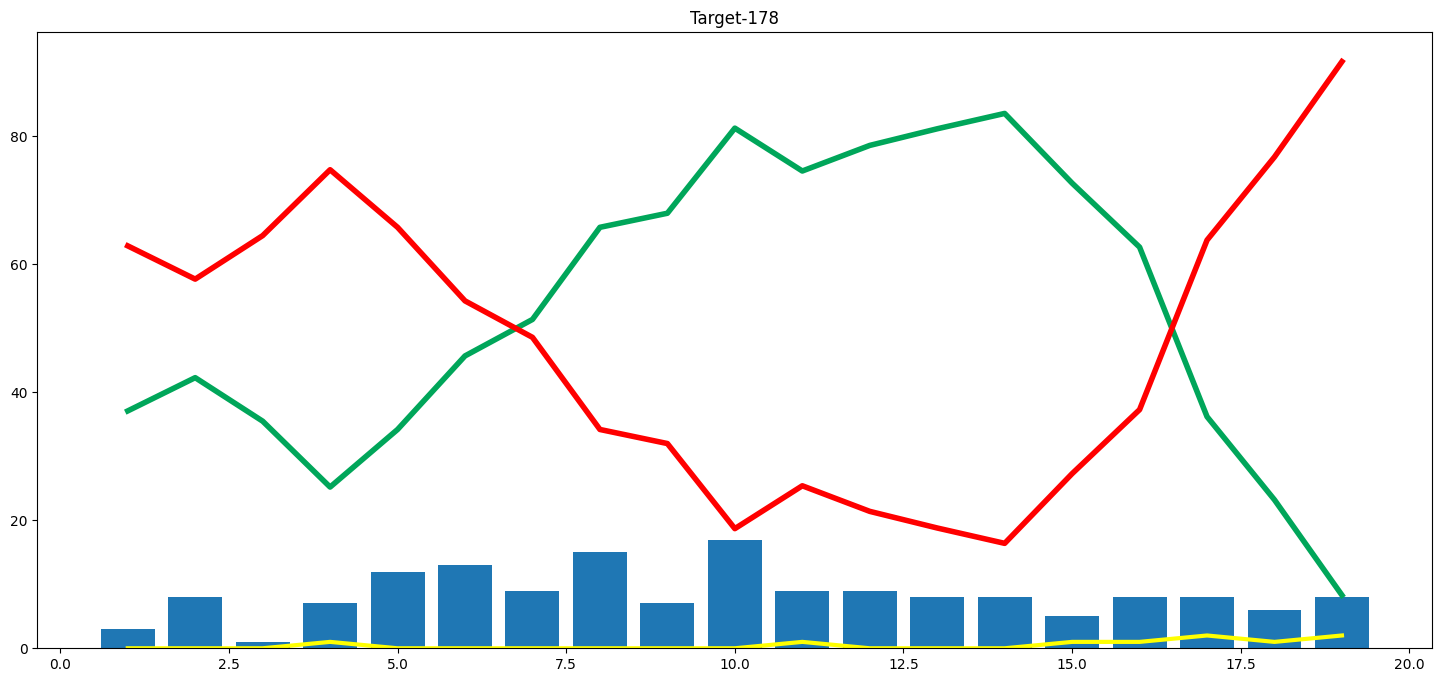

In [ ]:

plt.figure(figsize=(18,8))
plt.plot(temp_df['end_of_over'],temp_df['wickets_in_over'],color='yellow',linewidth=3)
plt.plot(temp_df['end_of_over'],temp_df['win'],color='#00a65a',linewidth=4)
plt.plot(temp_df['end_of_over'],temp_df['lose'],color='red',linewidth=4)
plt.bar(temp_df['end_of_over'],temp_df['runs_after_over'])
plt.title('Target-' + str(target))

In [ ]:
import pickle
pickle.dump(pipe,open('pipe.pkl','wb'))

In [ ]:
from google.colab import drive
drive.mount('/content/drive')